In [5]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-10-18 11:17:08--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-10-18 11:17:09--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdaab92687d1f174cb251d04e8b.dl.dropboxusercontent.com/cd/0/inline/CF1m0TmiUPmkSwDo-r0bI6tb7QcKXynpidamx7tgZBkStVHWwaJmR0QqN70tm_eWT7mjX31-U0rKmGH6RVvTynwHYqoVsjVb4mmWqzkISd5WbWXp9BEajjLQdHMT8xanmISo29zcID0pU_1OJ2uenEnZ/file# [following]
--2023-10-18 11:17:09--  https://ucdaab92687d1f174cb251d04e8b.dl.dropboxusercontent.com/cd/0/inline/CF1m0TmiUPmkSwDo-r0bI6tb7QcKXynpidamx7tgZBkStVHWwaJmR0QqN70tm_eWT7mjX31-U0rKmGH6RVvTynwHYqoVsjVb4mmWqzkISd5WbWXp9BEajjLQdHMT8x

In [6]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications import MobileNet
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [8]:


base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)


model = Model(base_model.input, x)

In [9]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [10]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "C:/Users/User/Downloads/Telegram Desktop/facesData/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 9808 images belonging to 2 classes.


{'nostress': 0, 'stress': 1}

In [11]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "C:/Users/User/Downloads/Telegram Desktop/facesData/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 2480 images belonging to 2 classes.


# visualizaing the data that is fed to train data gen

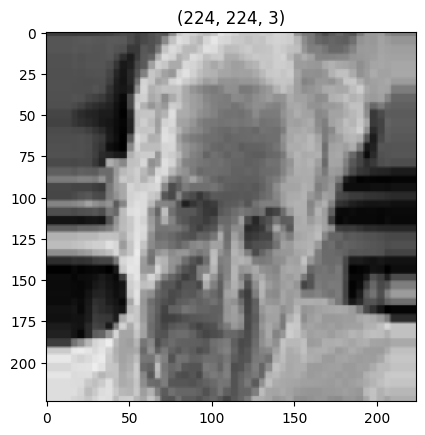

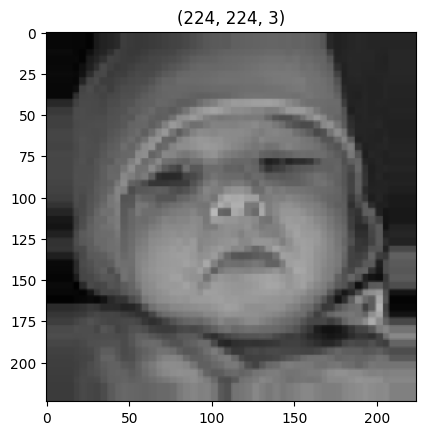

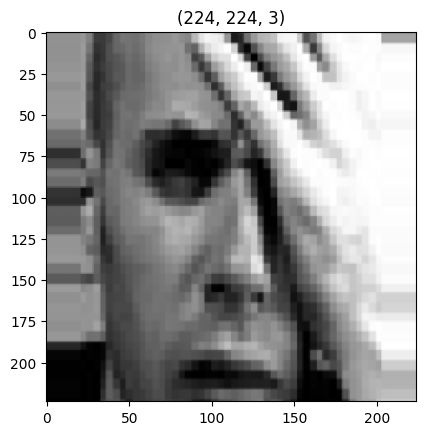

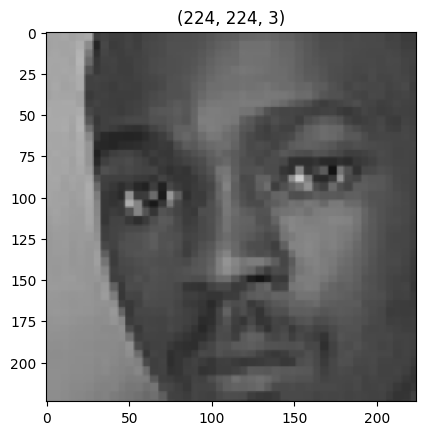

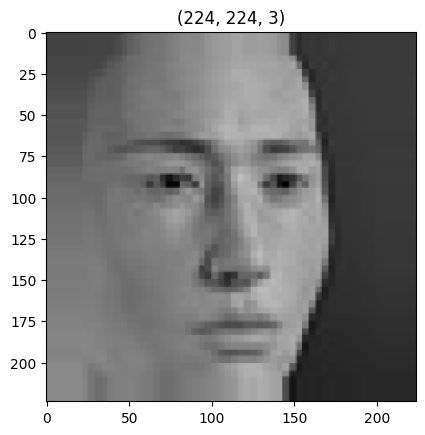

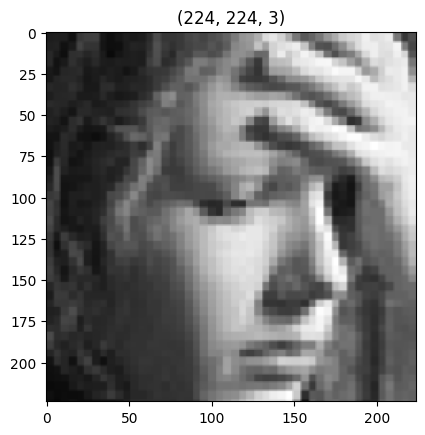

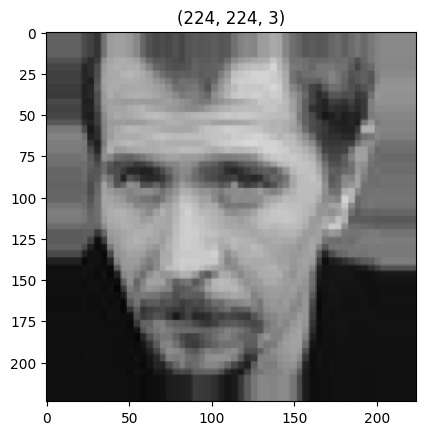

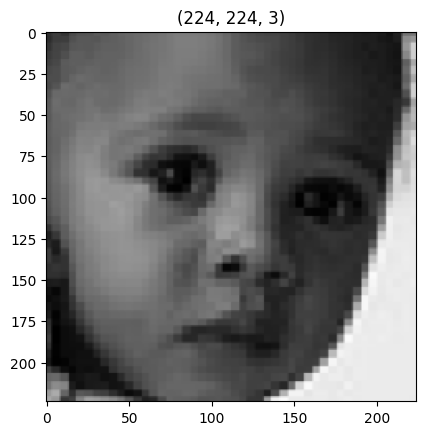

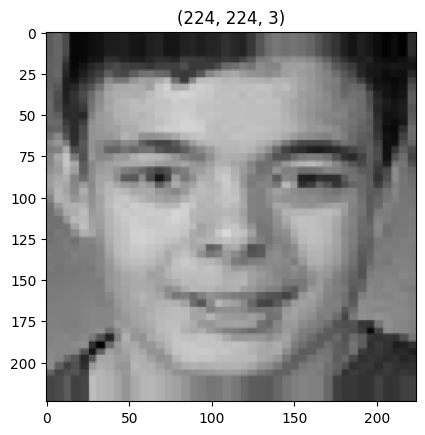

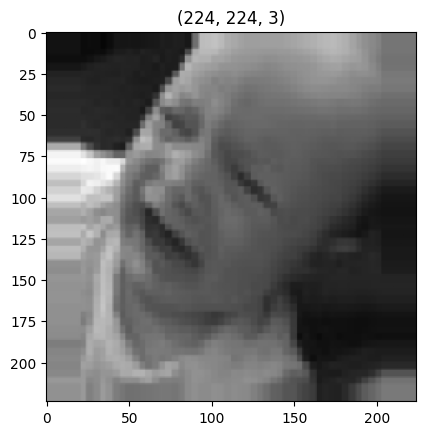

In [12]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [13]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.metrics import Accuracy

# Define the input dimension based on your data
input_dim = 32  # Replace with the actual input dimension

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(1, activation='sigmoid', input_shape=(input_dim,)))  # Specify input_shape

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=binary_crossentropy, metrics=[Accuracy()])

# Now you can access the model summary
model.summary()

# Continue with the rest of your code


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 33        
                                                                 


Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("C:/Users/User/Downloads/Telegram Desktop/Emotion-detection/best_model.h5")

Epoch 1/50
25/25 [==============================] - 2s 27ms/step - loss: 0.6775 - accuracy: 0.5412 - val_loss: 0.6519 - val_accuracy: 0.5900
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.6600 - val_loss: 0.6136 - val_accuracy: 0.8050
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5979 - accuracy: 0.7650 - val_loss: 0.5589 - val_accuracy: 0.8550
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5318 - accuracy: 0.8375 - val_loss: 0.4870 - val_accuracy: 0.8600
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.8775 - val_loss: 0.3909 - val_accuracy: 0.8900
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3639 - accuracy: 0.9075 - val_loss: 0.3320 - val_accuracy: 0.8950
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2950 - accuracy: 0.9150 - val_loss: 0.2530 - val_accuracy: 0.9650
Epoch 8/50
25/25 

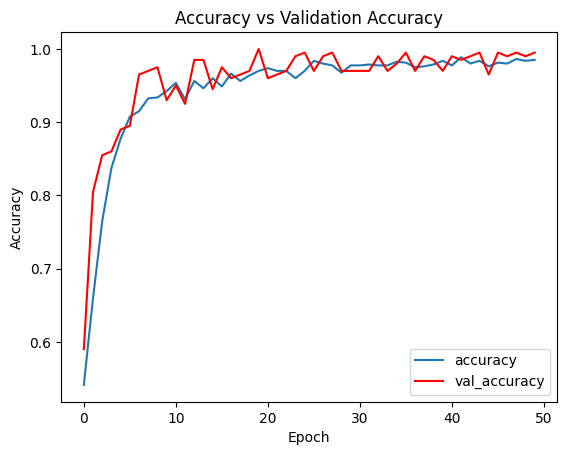

In [17]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Generate synthetic data
data = np.random.rand(1000, 2)
labels = (data[:, 0] + data[:, 1] > 1).astype(int)

# Define a Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation
history = model.fit(data, labels, epochs=50, batch_size=32, validation_split=0.2)

# Plot accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], c="red")
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


Epoch 1/50
25/25 [==============================] - 2s 19ms/step - loss: 0.6535 - accuracy: 0.5200 - val_loss: 0.6429 - val_accuracy: 0.4850
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6033 - accuracy: 0.5850 - val_loss: 0.5901 - val_accuracy: 0.6450
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5458 - accuracy: 0.7400 - val_loss: 0.5152 - val_accuracy: 0.7600
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 0.4687 - accuracy: 0.8413 - val_loss: 0.4295 - val_accuracy: 0.8450
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 0.3896 - accuracy: 0.8763 - val_loss: 0.3419 - val_accuracy: 0.9100
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.3144 - accuracy: 0.9200 - val_loss: 0.2655 - val_accuracy: 0.9700
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.2545 - accuracy: 0.9337 - val_loss: 0.2162 - val_accuracy: 0.9600
Epoch 8/50
25/25 [

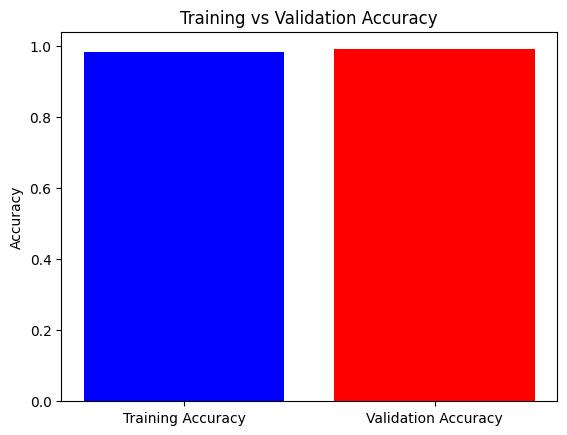

In [33]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Generate synthetic data
data = np.random.rand(1000, 2)
labels = (data[:, 0] + data[:, 1] > 1).astype(int)

# Define a Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation
history = model.fit(data, labels, epochs=50, batch_size=32, validation_split=0.2)

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a bar plot
x = ['Training Accuracy', 'Validation Accuracy']
y = [training_accuracy[-1], validation_accuracy[-1]]  # Use the final epoch's accuracy
plt.bar(x, y, color=['blue', 'red'])
plt.title("Training vs Validation Accuracy")
plt.ylabel('Accuracy')
plt.show()


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model by adding classification layers on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (stressed or not)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])




In [19]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


In [21]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("best_model.h5")

# Load the external image
image_path = r'C:/Users/User/Downloads/Telegram Desktop/facesData/train/stress/Training_2913.jpg'  # Replace with the path to your external image

# Attempt to load the image and handle errors
try:
    image = cv2.imread(image_path)
    
    if image is None:
        raise Exception("Error: Image not loaded.")
    
    # Preprocess the image (resize and normalize)
    image = cv2.resize(image, (224, 224))  # Resize to a common input size
    image = image / 255.0  # Normalize the pixel values (assuming the model expects values in the range [0, 1])

    # Make a prediction
    prediction = model.predict(np.expand_dims(image, axis=0))

    # Interpret the prediction (e.g., binary classification)
    class_label = "Class A" if prediction[0][0] >= 0.5 else "Class B"

    print(f"The image is predicted as: {class_label}")
except Exception as e:
    print(f"Error: {e}")


1/1 [==============================] - 1s 1s/step
The image is predicted as: Class B


In [22]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 1s 939ms/step
The image is of class3


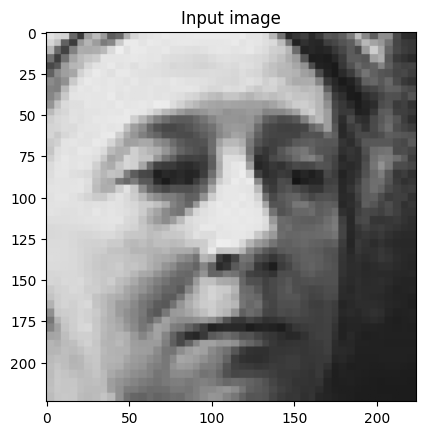

In [27]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Load your pre-trained model
model = load_model("best_model.h5")  # Replace with the actual path to your model

# Load the image
path = "C:/Users/User/Downloads/Telegram Desktop/facesData/train/stress/Training_2913.jpg"
img = load_img(path, target_size=(224, 224))

# Convert the image to a numpy array and normalize
i = img_to_array(img) / 255
input_arr = np.array([i])

# Get the model prediction
pred = np.argmax(model.predict(input_arr))

# Define your class labels
op = ["class1", "class2","class3"]  # Define your class labels here

print(f"The image is of {op[pred]}")

# Display the image
plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()


In [28]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import ttk

# Generate synthetic data
data = np.random.rand(1000, 2)
labels = (data[:, 0] + data[:, 1] > 1).astype(int)

# Define a Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Train the model with data augmentation
history = model.fit(data, labels, epochs=50, batch_size=32, validation_split=0.2)

# Create a Tkinter window
root = Tk()
root.title("Accuracy Plot")

# Extract training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create a bar plot
x = ['Training Accuracy', 'Validation Accuracy']
y = [training_accuracy[-1], validation_accuracy[-1]]  # Use the final epoch's accuracy

# Create a canvas to display the plot
canvas = Canvas(root, width=400, height=300)
canvas.pack()

# Plot the data on the canvas
canvas.create_rectangle(50, 50, 200, 200, fill="blue")
canvas.create_rectangle(250, 50, 400, 200, fill="red")

# Create labels for the bars
canvas.create_text(125, 210, text="Training", fill="black")
canvas.create_text(325, 210, text="Validation", fill="black")

root.mainloop()


Epoch 1/50
25/25 [==============================] - 2s 25ms/step - loss: 0.6993 - accuracy: 0.5025 - val_loss: 0.6709 - val_accuracy: 0.6750
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6524 - accuracy: 0.6988 - val_loss: 0.6360 - val_accuracy: 0.7600
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5970 - accuracy: 0.7987 - val_loss: 0.5818 - val_accuracy: 0.8000
Epoch 4/50
25/25 [==============================] - 0s 13ms/step - loss: 0.5282 - accuracy: 0.8537 - val_loss: 0.4950 - val_accuracy: 0.8800
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4339 - accuracy: 0.8763 - val_loss: 0.4009 - val_accuracy: 0.9100
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.3585 - accuracy: 0.8913 - val_loss: 0.3311 - val_accuracy: 0.9150
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.2901 - accuracy: 0.9250 - val_loss: 0.2602 - val_accuracy: 0.9450
Epoch 8/50
25/25